<a href="https://colab.research.google.com/github/dung18520632/CS114.K21/blob/master/Dophuctap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
Dophuctap=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dophuctap.csv',names=["size",'count'])

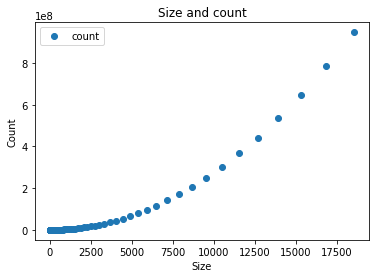

In [11]:
Dophuctap.plot(x="size",y="count",style="o")
plt.title('Size and count')
plt.xlabel("Size")
plt.ylabel("Count")
plt.show()


In [18]:
X=Dophuctap.drop('count',axis=1)
Y=Dophuctap['count']

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [23]:
model=LinearRegression()
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
result=model.score(X_test,Y_test)
print('result',result)
print('weight: ', model.coef_)
print('bias: ',model.intercept_)

result 0.42082314248036923
weight:  [39453.82100135]
bias:  -32121215.28901063


In [33]:
print('Mean squared error:',  np.sqrt(mean_squared_error(Y_test, Y_pred)))
print('Coefficient of determination:', r2_score(Y_test, Y_pred))

Mean squared error: 36858635.43189289
Coefficient of determination: 0.42082314248036923


In [34]:
from sklearn.preprocessing import PolynomialFeatures

In [35]:
polynomial_features= PolynomialFeatures(degree=2)

In [36]:
x_poly = polynomial_features.fit_transform(X)

In [49]:
model_1 = LinearRegression()
model_1.fit(x_poly, Y)
y_poly_pred = model_1.predict(x_poly)

rmse = np.sqrt(mean_squared_error(Y,y_poly_pred))
r2 = r2_score(Y,y_poly_pred)
print(rmse)
print(r2)

166168.2808980746
0.9999990554181919


ValueError: ignored

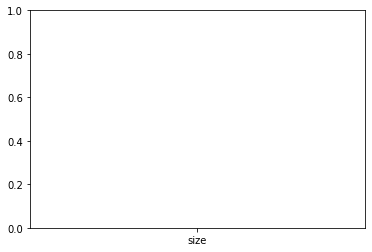

In [50]:
import operator
plt.scatter(X, Y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,y_poly_pred), key=sort_axis)
X, y_poly_pred = zip(*sorted_zip)
plt.plot(X, y_poly_pred, color='m')
plt.show()